#Rusheel Sharma
#I069
#B.Tech AI Sem 6
#ATML Lab 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Task 1 - H2O AutoML

#a. To implement and evaluate the performance on the Churn dataset for predicting customer retention using H2O AutoML library

In [ ]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.17" 2025-10-21; OpenJDK Runtime Environment (build 17.0.17+10-Ubuntu-122.04); OpenJDK 64-Bit Server VM (build 17.0.17+10-Ubuntu-122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.12/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpogj74dbx
  JVM stdout: /tmp/tmpogj74dbx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpogj74dbx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_olpg2e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = pd.read_csv("/content/Churn_Predictions.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis='columns', inplace=True)

In [ ]:
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,1


#Training

In [ ]:
df_train_h2o = h2o.H2OFrame(df_train)
df_test_h2o = h2o.H2OFrame(df_test)

x = list(df_train.columns)
y = "Exited"
aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity="info", nfolds=2)
aml.train(x=x, y=y, training_frame=df_train_h2o)


lb = aml.leaderboard
lb.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
09:14:41.252: Project: AutoML_1_20260108_91441
09:14:41.258: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
09:14:41.258: Build control seed: 10
09:14:41.262: training frame: Frame key: AutoML_1_20260108_91441_training_Key_Frame__upload_bfd59d33b25d5f94522ba7327de04770.hex    cols: 11    rows: 8000  chunks: 1    size: 118004  checksum: 5593362793361752032
09:14:41.262: validation frame: NULL
09:14:41.262: leaderboard frame: NULL
09:14:41.262: blending frame: NULL
09:14:41.262: response column: Exited
09:14:41.262: fold column: null
09:14:41.262: weights column: null
09:14:41.315: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF :

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20260108_91441,0.323888,0.104904,0.213584,0.227754,0.104904
StackedEnsemble_BestOfFamily_1_AutoML_1_20260108_91441,0.324741,0.105456,0.2152,0.228416,0.105456
GBM_1_AutoML_1_20260108_91441,0.325485,0.10594,0.218085,0.228708,0.10594
GBM_2_AutoML_1_20260108_91441,0.325719,0.106093,0.213217,0.228659,0.106093
GBM_3_AutoML_1_20260108_91441,0.327959,0.107557,0.215381,0.230464,0.107557
GBM_4_AutoML_1_20260108_91441,0.330253,0.109067,0.219525,0.232276,0.109067
DRF_1_AutoML_1_20260108_91441,0.331015,0.109571,0.218361,0.234329,0.109571
XGBoost_3_AutoML_1_20260108_91441,0.333819,0.111435,0.219544,0.235749,0.111435
XRT_1_AutoML_1_20260108_91441,0.343832,0.11822,0.25766,0.246095,0.11822
XGBoost_1_AutoML_1_20260108_91441,0.362636,0.131505,0.25029,0.264278,0.131505


Convert y to categorical

In [ ]:

df_train_h2o = h2o.H2OFrame(df_train)
df_test_h2o = h2o.H2OFrame(df_test)


df_train_h2o["Exited"] = df_train_h2o["Exited"].asfactor()
df_test_h2o["Exited"] = df_test_h2o["Exited"].asfactor()


y = "Exited"
x = [col for col in df_train_h2o.columns if col != y]


aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity="info", nfolds=2)
aml.train(x=x, y=y, training_frame=df_train_h2o)


lb = aml.leaderboard
print(lb.head())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
09:22:59.998: Project: AutoML_3_20260108_92259
09:23:00.10: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
09:23:00.10: Build control seed: 10
09:23:00.11: training frame: Frame key: AutoML_3_20260108_92259_training_py_9_sid_ab26    cols: 11    rows: 8000  chunks: 1    size: 118556  checksum: 5593362793361752032
09:23:00.11: validation frame: NULL
09:23:00.11: leaderboard frame: NULL
09:23:00.11: blending frame: NULL
09:23:00.11: response column: Exited
09:23:00.11: fold column: null
09:23:00.11: weights column: null
09:23:00.11: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (

In [ ]:
df_test_h2o = h2o.H2OFrame(df_test)

aml.leader.model_performance(df_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.09770800397396853
RMSE: 0.31258279539022704
LogLoss: 0.3227642792626557
AUC: 0.872554235524922
AUCPR: 0.7070335386292329
Gini: 0.7451084710498439
Null degrees of freedom: 1999
Residual degrees of freedom: 1991
Null deviance: 1983.0509963252239
Residual deviance: 1291.0571170506228
AIC: 1309.0571170506228

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3112158522524954
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1440  167  0.1039   (167.0/1607.0)
1      124   269  0.3155   (124.0/393.0)
Total  1564  436  0.1455   (291.0/2000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.311216     0.648975  192
max f2                       0.227135     0.712959  232
max f0point5                 0.627305     0.678479  93
max accuracy                 0.502123     0.8665    128
max precision                0.985948     1         0
max recall                   0.0129322    1         395
max specificity              0.985948     1         0
max absolute_mcc             0.311216     0.558712  192
max min_per_class_accuracy   0.204964     0.796438  243
max mean_per_class_accuracy  0.244412     0.807317  222
max tns                      0.985948     1607      0
max fns                      0.985948     391       0
max fps                      0.00897513   1607      399
max tps                      0.0129322    393       395
max tnr                      0.985948     1         0
max fnr                      0.985948     0.994911  0
max fpr                      0.00897513   1         399
max tpr                      0.0129322    1         395

Gains/Lift Table: Avg response rate: 19.65 %, avg score: 20.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.935126           5.08906    5.08906            1                0.957644   1                           0.957644            0.0508906       0.0508906                  408.906   408.906            0.0508906
2        0.02                        0.913647           5.08906    5.08906            1                0.924285   1                           0.940965            0.0508906       0.101781                   408.906   408.906            0.101781
3        0.03                        0.875806           4.58015    4.91942            0.9              0.89484    0.966667                    0.92559             0.0458015       0.147583                   358.015   391.942            0.146338
4        0.04                        0.850872           4.58015    4.83461            0.9              0.861921   0.95                        0.909673            0.0458015       0.193384                   358.015   383.461            0.190895
5        0.05                        0.805587           3.81679    4.63104            0.75             0.826476   0.91                        0.893033            0.0381679       0.231552                   281.679   363.104            0.225952
6        0.1                         0.602156           3.46056    4.0458             0.68             0.706488   0.795                       0.799761            0.173028        0.40458                    246.056   304.58             0.379067
7        0.15                        0.460158           2.64631    3.5793             0.52             0.528924   0.703333               

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])
model_ids

/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['StackedEnsemble_AllModels_1_AutoML_3_20260108_92259',
 'StackedEnsemble_BestOfFamily_1_AutoML_3_20260108_92259',
 'GBM_1_AutoML_3_20260108_92259',
 'GBM_2_AutoML_3_20260108_92259',
 'XGBoost_3_AutoML_3_20260108_92259',
 'GBM_3_AutoML_3_20260108_92259',
 'XGBoost_1_AutoML_3_20260108_92259',
 'GBM_4_AutoML_3_20260108_92259',
 'DRF_1_AutoML_3_20260108_92259',
 'XGBoost_2_AutoML_3_20260108_92259',
 'XRT_1_AutoML_3_20260108_92259',
 'GLM_1_AutoML_3_20260108_92259']

In [ ]:

model_id = [mid for mid in model_ids if "StackedEnsemble" in mid][0]
stacked_ensemble_model = h2o.get_model(model_id)

stacked_ensemble_model.params

aml.leader

df_test_h2o = h2o.H2OFrame(df_test)

y_pred = aml.leader.predict(df_test_h2o)
y_pred

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.955738,0.0442617
0,0.965852,0.0341481
0,0.863375,0.136625
0,0.827593,0.172407
0,0.902228,0.0977724
0,0.986254,0.0137463
0,0.848493,0.151507
0,0.674507,0.325493
0,0.7069,0.2931
1,0.646587,0.353413


#b. Implement and evaluate performance on any other dataset of your choice using H2O AutoML library

In [ ]:
df2 = pd.read_csv("/content/train.csv")

In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df2.drop(['PassengerId', 'Name', 'Ticket','Embarked','Cabin'], axis='columns', inplace=True)

In [ ]:
df2.size

6237

In [ ]:
df2.shape

(891, 7)

In [ ]:
df2_train, df2_test = train_test_split(df2, test_size=0.2, random_state=42)
df2_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
331,0,1,male,45.5,0,0,28.5000
733,0,2,male,23.0,0,0,13.0000
382,0,3,male,32.0,0,0,7.9250
704,0,3,male,26.0,1,0,7.8542
813,0,3,female,6.0,4,2,31.2750


#Training

In [ ]:
df2_train_h2o = h2o.H2OFrame(df2_train)
df2_test_h2o = h2o.H2OFrame(df2_test)

df2_train_h2o["Survived"] = df2_train_h2o["Survived"].asfactor()
df2_test_h2o["Survived"] = df2_test_h2o["Survived"].asfactor()

x = list(df2_train.columns)
y = "Survived"
aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity="info", nfolds=2)
aml.train(x=x, y=y, training_frame=df2_train_h2o)


lb = aml.leaderboard
lb.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:01:26.371: Project: AutoML_5_20260108_100126
10:01:26.374: Setting stopping tolerance adaptively based on the training frame: 0.03747658444979307
10:01:26.374: Build control seed: 10
10:01:26.374: training frame: Frame key: AutoML_5_20260108_100126_training_py_20_sid_ab26    cols: 7    rows: 712  chunks: 1    size: 8218  checksum: 6387017201274079992
10:01:26.374: validation frame: NULL
10:01:26.374: leaderboard frame: NULL
10:01:26.374: blending frame: NULL
10:01:26.374: response column: Survived
10:01:26.374: fold column: null
10:01:26.374: weights column: null
10:01:26.374: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_5_20260108_100126,0.866231,0.419767,0.843425,0.193458,0.359357,0.129138
GBM_4_AutoML_5_20260108_100126,0.866176,0.416191,0.851381,0.175961,0.35781,0.128028
StackedEnsemble_BestOfFamily_1_AutoML_5_20260108_100126,0.865268,0.419005,0.838157,0.18529,0.357938,0.12812
StackedEnsemble_AllModels_1_AutoML_5_20260108_100126,0.864793,0.419066,0.842096,0.18645,0.358429,0.128471
GBM_2_AutoML_5_20260108_100126,0.863936,0.417742,0.844442,0.181693,0.358708,0.128672
DRF_1_AutoML_5_20260108_100126,0.856595,0.503607,0.831231,0.19877,0.371783,0.138223
GBM_3_AutoML_5_20260108_100126,0.856322,0.430568,0.836616,0.188769,0.364911,0.13316
XRT_1_AutoML_5_20260108_100126,0.851914,0.452377,0.815979,0.204854,0.377333,0.14238
XGBoost_2_AutoML_5_20260108_100126,0.838724,0.451947,0.826086,0.200383,0.373959,0.139846
GLM_1_AutoML_5_20260108_100126,0.838056,0.465066,0.80279,0.225007,0.385158,0.148347


In [ ]:
df2_test_h2o = h2o.H2OFrame(df2_test)

aml.leader.model_performance(df2_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13067594629883428
RMSE: 0.3614912810827313
LogLoss: 0.4205488595101157
Mean Per-Class Error: 0.14774774774774774
AUC: 0.8895752895752895
AUCPR: 0.8573049679342057
Gini: 0.7791505791505791

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3721861243247986
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      91   14   0.1333   (14.0/105.0)
1      12   62   0.1622   (12.0/74.0)
Total  103  76   0.1453   (26.0/179.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.372186     0.826667  70
max f2                       0.126733     0.853365  114
max f0point5                 0.372186     0.820106  70
max accuracy                 0.372186     0.854749  70
max precision                0.993341     1         0
max recall                   0.0476239    1         153
max specificity              0.993341     1         0
max absolute_mcc             0.372186     0.70189   70
max min_per_class_accuracy   0.33463      0.838095  74
max mean_per_class_accuracy  0.372186     0.852252  70
max tns                      0.993341     105       0
max fns                      0.993341     73        0
max fps                      0.0126958    105       163
max tps                      0.0476239    74        153
max tnr                      0.993341     1         0
max fnr                      0.993341     0.986486  0
max fpr                      0.0126958    1         163
max tpr                      0.0476239    1         153

Gains/Lift Table: Avg response rate: 41.34 %, avg score: 40.93 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111732                   0.989032           2.41892   2.41892            1                0.991704   1                           0.991704            0.027027        0.027027                   141.892   141.892            0.027027
2        0.0223464                   0.98617            2.41892   2.41892            1                0.98802    1                           0.989862            0.027027        0.0540541                  141.892   141.892            0.0540541
3        0.0335196                   0.982869           2.41892   2.41892            1                0.984341   1                           0.988022            0.027027        0.0810811                  141.892   141.892            0.0810811
4        0.0446927                   0.980631           2.41892   2.41892            1                0.981328   1                           0.986348            0.027027        0.108108                   141.892   141.892            0.108108
5        0.0502793                   0.979183           2.41892   2.41892            1                0.979242   1                           0.985559            0.0135135       0.121622                   141.892   141.892            0.121622
6        0.100559                    0.966878           2.15015   2.28453            0.888889         0.974988   0.944444                    0.980274            0.108108        0.22973                    115.015   128.453            0.220206
7        0.150838                    0.947574           1.88138   2.15015            0.777778         0.960205   0.888889                    0.973584            0.0945946       0.324324                   88.1381   115.015            0.295753
8        0.201117                    0.916355    

In [ ]:
aml.leader

df2_test_h2o = h2o.H2OFrame(df2_test)

y_pred2 = aml.leader.predict(df2_test_h2o)
y_pred2

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.922745,0.077255
0,0.795643,0.204357
0,0.857972,0.142028
1,0.00993335,0.990067
1,0.472281,0.527719
1,0.029861,0.970139
1,0.23123,0.76877
0,0.851736,0.148264
1,0.288796,0.711204
1,0.0976431,0.902357


#Task 2 - AutoKeras

In [ ]:
pip install autokeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 10.4 MB/s eta 0:00:00


In [ ]:
import autokeras as ak



#a.	To utilize Auto-Keras for automating the design and training of deep learning models on the MNIST dataset

In [ ]:
import struct
from array import array
from os.path  import join
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
clf = ak.ImageClassifier(max_trials=1, overwrite=True)

In [ ]:
print("Starting Neural Architecture Search for MNIST...")
clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 01m 25s]
val_loss: 0.0674125924706459

Best val_loss So Far: 0.0674125924706459
Total elapsed time: 00h 01m 25s
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.9083 - loss: 0.2898


In [ ]:
accuracy = clf.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9765 - loss: 0.0742
Test Accuracy: [0.059114668518304825, 0.9814000129699707]


In [ ]:
model = clf.export_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ expand_last_dim (ExpandLastDim) │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        92,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,989 (433.55 KB)

 Trainable params: 110,986 (433.54 KB)

 Non-trainable params: 3 (16.00 B)

#b.	Implement and evaluate performance on any other dataset of your choice using AutoKeras Framework.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
file_path = 'iris.csv'
data = pd.read_csv(file_path)

In [ ]:
X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = ak.StructuredDataClassifier(
    max_trials=3,
    overwrite=True
)

In [ ]:
print("Starting Architecture Search for Iris Dataset...")
clf.fit(
    X_train.to_numpy(),
    y_train.to_numpy(),
    epochs=10
)

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.7916666865348816

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 00m 09s
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4567 - loss: 1.1027  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4454 - loss: 1.0823 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5048 - loss: 1.0310 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5679 - loss: 0.9848 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5583 - loss: 0.9358 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6185 - loss: 0.9022 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6721 - loss: 0.8640 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7163 - loss: 0.8053 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6950 - loss: 0.8031 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7310 - loss: 0.7943 


In [ ]:
loss, accuracy = clf.evaluate(X_test.to_numpy(), y_test.to_numpy())
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8667 - loss: 0.8549
Test Accuracy: 0.8666666746139526


In [ ]:
model = clf.export_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 732 (2.86 KB)

 Trainable params: 723 (2.82 KB)

 Non-trainable params: 9 (40.00 B)

# Zero shot learning

Task 4:

i.	Load the CIFAR 10 dataset in your notebook

ii.	Extract a subset of 100 images for simplicity

iii.	Load any pre-trained CNN model. This model is to be used as feature extractor.

iv.	Extract the features of the images of the dataset.

v.	Define Semantic Embeddings for Labels

vi.	Encode label descriptions using TF-IDF.

vii.	Compute similarity between image features and label embeddings

viii.	Assign the label with the highest similarity score

ix.	Evaluate results

x.	Display some results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.datasets import cifar10
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression

In [ ]:

print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x_train_processed = preprocess_input(x_train.astype('float32'))
x_test_processed = preprocess_input(x_test.astype('float32'))

In [ ]:
# ii. Extract a subset of 100 images for simplicity
indices = np.random.choice(len(x_test), 100, replace=False)
x_subset = x_test_processed[indices]
y_subset = y_test[indices].flatten()
x_subset_raw = x_test[indices]

In [ ]:
# iii. Load any pre-trained CNN model

print("Loading Pre-trained ResNet50...")

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))


Loading Pre-trained ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# iv. Extract the features of the images

print("Extracting features for the subset...")
subset_features = base_model.predict(x_subset, verbose=0)

Extracting features for the subset...


In [ ]:
# v. Define Semantic Embeddings for Labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
descriptions = [
    "A powered flying vehicle with fixed wings and a weight greater than that of the air it displaces.", # airplane
    "A road vehicle, typically with four wheels, powered by an internal combustion engine or electric motor.", # automobile
    "A warm-blooded egg-laying vertebrate distinguished by the possession of feathers, wings, and a beak.", # bird
    "A small domesticated carnivorous mammal with soft fur, a short snout, and retractile claws.", # cat
    "A hoofed grazing or browsing animal, with branched bony antlers that are shed annually.", # deer
    "A domesticated carnivorous mammal that typically has a long snout, an acute sense of smell, and a barking voice.", # dog
    "A tailless amphibian with a short stout body and long hind legs for leaping.", # frog
    "A large-hoofed plant-eating domesticated mammal with a flowing mane and tail, used for riding.", # horse
    "A large boat for transporting people or goods by sea.", # ship
    "A large, heavy motor vehicle used for transporting goods, materials, or troops." # truck
]

In [ ]:
# vi. Encode label descriptions using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english')
label_embeddings = vectorizer.fit_transform(descriptions).toarray()

print(f"Image Feature Shape: {subset_features.shape}")
print(f"Label Embedding Shape: {label_embeddings.shape}")

Image Feature Shape: (100, 2048)
Label Embedding Shape: (10, 74)


In [ ]:
print("Training Visual-to-Semantic Mapping (Linear Regression)...")

n_train_samples = 2000
x_train_chunk = x_train_processed[:n_train_samples]
y_train_chunk = y_train[:n_train_samples].flatten()

train_features = base_model.predict(x_train_chunk, verbose=0)

Training Visual-to-Semantic Mapping (Linear Regression)...


In [ ]:
train_semantic_targets = label_embeddings[y_train_chunk]

mapper = LinearRegression()
mapper.fit(train_features, train_semantic_targets)

LinearRegression()

In [ ]:
# vii. Compute similarity between image features and label embeddings

predicted_semantics = mapper.predict(subset_features)

similarities = cosine_similarity(predicted_semantics, label_embeddings)

In [ ]:
# viii. Assign the label with the highest similarity score

predicted_indices = np.argmax(similarities, axis=1)
predicted_labels = [class_names[i] for i in predicted_indices]

In [ ]:
# ix. Evaluate results

correct_predictions = np.sum(predicted_indices == y_subset)
accuracy = correct_predictions / len(y_subset)
print(f"\nZero-Shot (Attribute-based) Accuracy on Subset: {accuracy * 100:.2f}%")


Zero-Shot (Attribute-based) Accuracy on Subset: 21.00%


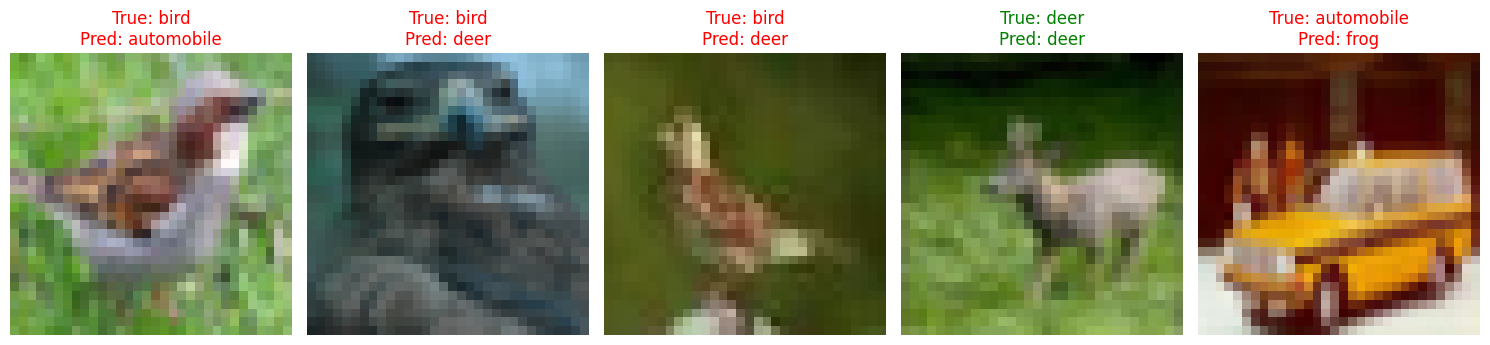

In [ ]:
# x. Display some results

plt.figure(figsize=(15, 5))
for i in range(5): # Show first 5 images
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_subset_raw[i])
    plt.axis('off')
    true_label = class_names[y_subset[i]]
    pred_label = predicted_labels[i]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

Predicted Class: deer


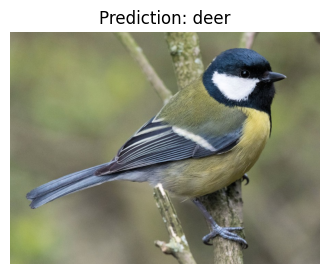


Class        | Similarity
-------------------------
deer         | 43.00%
dog          | 36.68%
frog         | 32.82%
airplane     | 18.95%
bird         | 4.99%
horse        | -13.77%
ship         | -16.66%
automobile   | -21.89%
truck        | -25.67%
cat          | -46.94%


In [ ]:
from tensorflow.keras.preprocessing import image



img_path = "/content/900.jpg"

img = image.load_img(img_path, target_size=(32, 32))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = preprocess_input(img_array)



feature_vector = base_model.predict(img_array, verbose=0)

semantic_vector = mapper.predict(feature_vector)


similarity = cosine_similarity(semantic_vector, label_embeddings)

predicted_index = np.argmax(similarity)

predicted_label = class_names[predicted_index]

print(f"Predicted Class: {predicted_label}")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(4, 4))

img_display = mpimg.imread(img_path)
plt.imshow(img_display)
plt.axis('off')
predicted_index = np.argmax(similarity)
plt.title(f"Prediction: {class_names[predicted_index]}")
plt.show()


print(f"\n{'Class':<12} | {'Similarity':<10}")
print("-" * 25)

scores = similarity[0]
sorted_results = sorted(zip(class_names, scores), key=lambda x: x[1], reverse=True)

for label, score in sorted_results:
    print(f"{label:<12} | {score * 100:.2f}%")


Predicted Class: frog


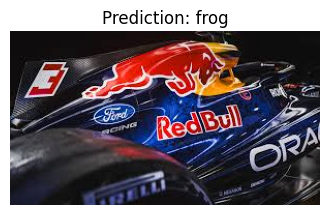


Class        | Similarity
-------------------------
frog         | 44.92%
airplane     | 39.09%
deer         | 31.74%
cat          | 10.78%
automobile   | 8.60%
bird         | -8.99%
dog          | -26.84%
truck        | -28.24%
horse        | -31.38%
ship         | -56.46%


In [ ]:
from tensorflow.keras.preprocessing import image



img_path = "/content/images.jpg"

img = image.load_img(img_path, target_size=(32, 32))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = preprocess_input(img_array)



feature_vector = base_model.predict(img_array, verbose=0)

semantic_vector = mapper.predict(feature_vector)


similarity = cosine_similarity(semantic_vector, label_embeddings)

predicted_index = np.argmax(similarity)

predicted_label = class_names[predicted_index]

print(f"Predicted Class: {predicted_label}")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(4, 4))

img_display = mpimg.imread(img_path)
plt.imshow(img_display)
plt.axis('off')
predicted_index = np.argmax(similarity)
plt.title(f"Prediction: {class_names[predicted_index]}")
plt.show()


print(f"\n{'Class':<12} | {'Similarity':<10}")
print("-" * 25)

scores = similarity[0]
sorted_results = sorted(zip(class_names, scores), key=lambda x: x[1], reverse=True)

for label, score in sorted_results:
    print(f"{label:<12} | {score * 100:.2f}%")


Learned how to impliment AutoMl on different datasets and the princ